In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see that most of the columns have missing values which we have to fill before we move ahead.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In this column there is 3+ value which i will replace by 3 because even if we do the lable encoding on this column, there same thing is going to happen.

In [6]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [10]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [11]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Credit_History is already seems to be encoded with 0 for having no credit history and 1 for having credit history.

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In our target column we can see that there is a clear cut problem of class imbalance. For y we have 422 numbers compared to 192 for no.

In [13]:
df['Dependents'].replace('3+','3',inplace=True)

In [14]:
df['Dependents'] = df['Dependents'].astype(float)

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there are no missing values.

In [17]:
df.describe()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.744300      5403.459283        1621.245798  145.752443   
std      1.009623      6109.041673        2926.248369   84.107233   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.250000   
50%      0.000000      3812.500000        1188.500000  128.000000   
75%      1.000000      5795.000000        2297.250000  164.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         342.410423        0.855049  
std           64.428629        0.352339  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000

1. In Applicant Income we can see big dispersion. Minimum is 150 where as maximum is 81000. Also mean is higher than median.
2. Same goes for Coapplicant income.
3. In case of Loan amount, out of 100%, 75% people have taken loan below 164.75, making the destributin skewed to right side.
4. Credit history is however encoded value like 0 and 1.

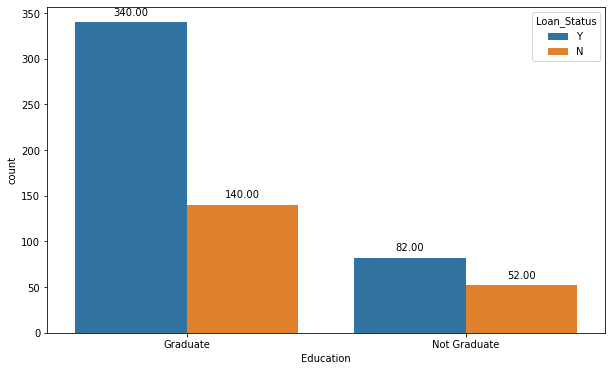

In [18]:
plt.figure(figsize=[10,6])
Education =sns.countplot(data=df, x= 'Education', hue='Loan_Status')
for p in Education.patches:
    Education.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As we can see, People who are graduated tend to apply for loans and their approval rate(59%) is much more better compared to people who are not graduated.(27%)

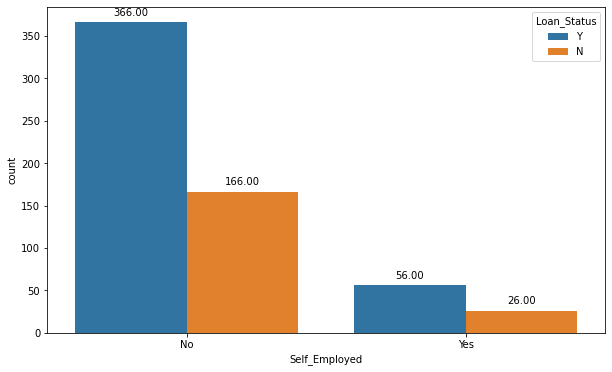

In [19]:
plt.figure(figsize=[10,6])
Self_Employed =sns.countplot(data=df, x= 'Self_Employed', hue='Loan_Status')
for p in Self_Employed.patches:
    Self_Employed.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

When i see abot plot, we can see that the people who are not self-employeed are having the much more applications of the loans. It is possible that majority people from this category are salaried people. Here also the approval rates are much more better when people are not self-employeed. 

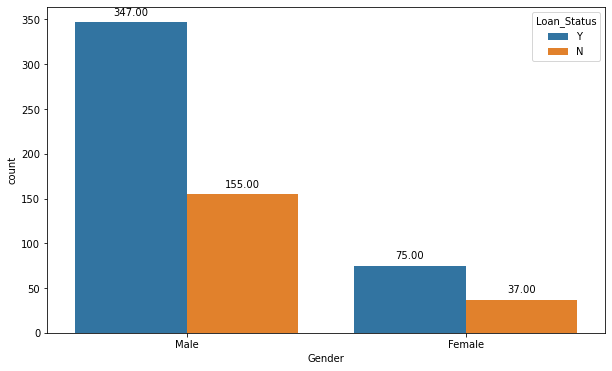

In [20]:
plt.figure(figsize=[10,6])
Gender =sns.countplot(data=df, x= 'Gender', hue='Loan_Status')
for p in Gender.patches:
    Gender.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Males are having much more higher applications as well as approval rate compared to females.

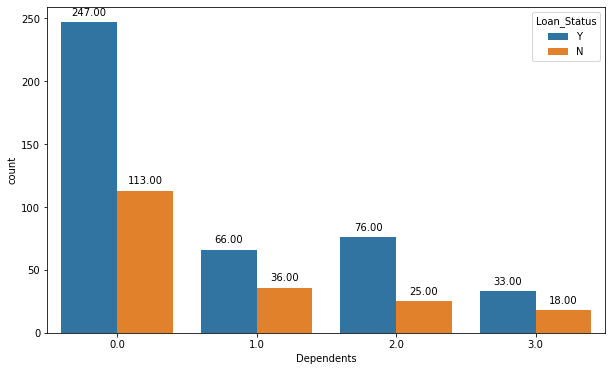

In [21]:
plt.figure(figsize=[10,6])
Dependents =sns.countplot(data=df, x= 'Dependents', hue='Loan_Status')
for p in Dependents.patches:
    Dependents.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

From the plot we can see the there are highest number of applications who have no dependent at all. 

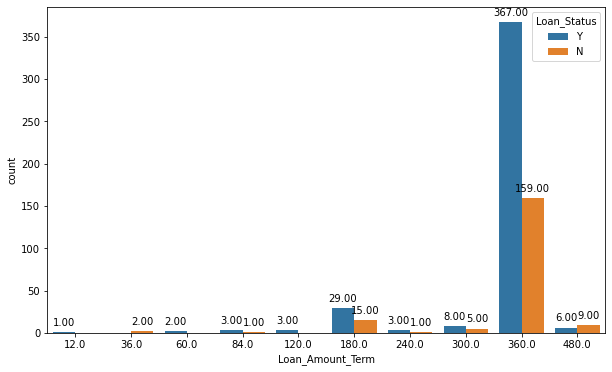

In [22]:
plt.figure(figsize=[10,6])
Loan_Amount_Term =sns.countplot(data=df, x= 'Loan_Amount_Term', hue='Loan_Status')
for p in Loan_Amount_Term.patches:
    Loan_Amount_Term.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Plot clearly shows that highest number of loans were applied and approved for the tenure of 30 years.

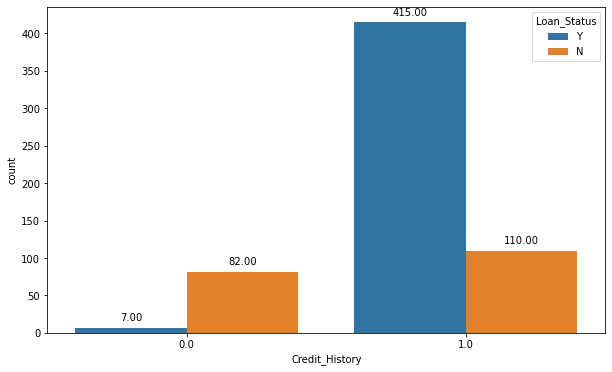

In [23]:
plt.figure(figsize=[10,6])
Credit_History =sns.countplot(data=df, x= 'Credit_History', hue='Loan_Status')
for p in Credit_History.patches:
    Credit_History.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As per the plot those who have credit history, have higher chances of getting their loans approved.

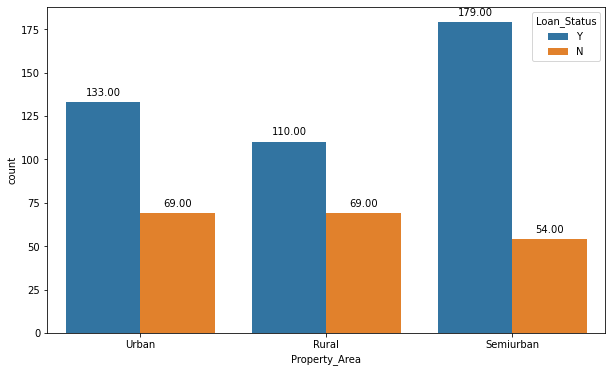

In [24]:
plt.figure(figsize=[10,6])
Property_Area =sns.countplot(data=df, x= 'Property_Area', hue='Loan_Status')
for p in Property_Area.patches:
    Property_Area.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Loan ID is just random loan ID, hence it will not be any use to us in the analysis, hence i will drop it.

In [25]:
df.drop(['Loan_ID'], inplace=True, axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder
df1 = df.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

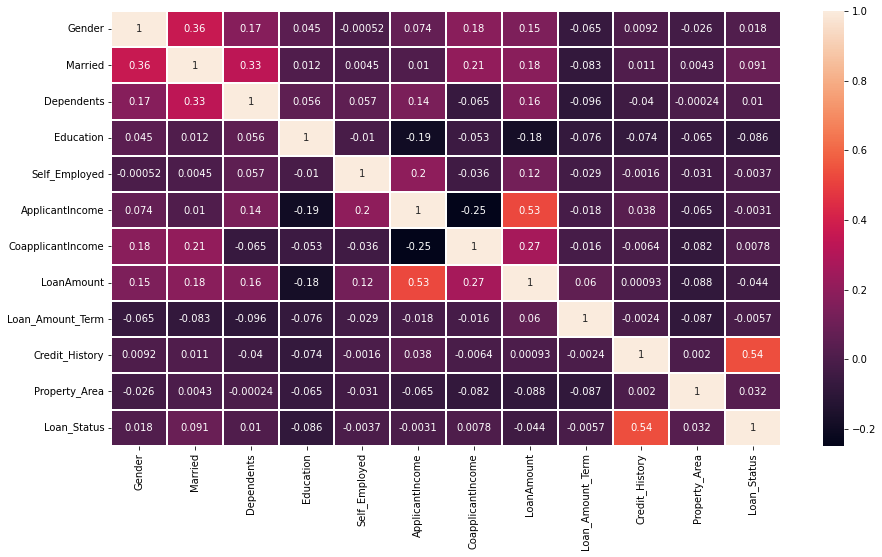

In [27]:
plt.figure(figsize=[15,8])
sns.heatmap(df1.corr(), annot=True, linewidth=1, linecolor='w')

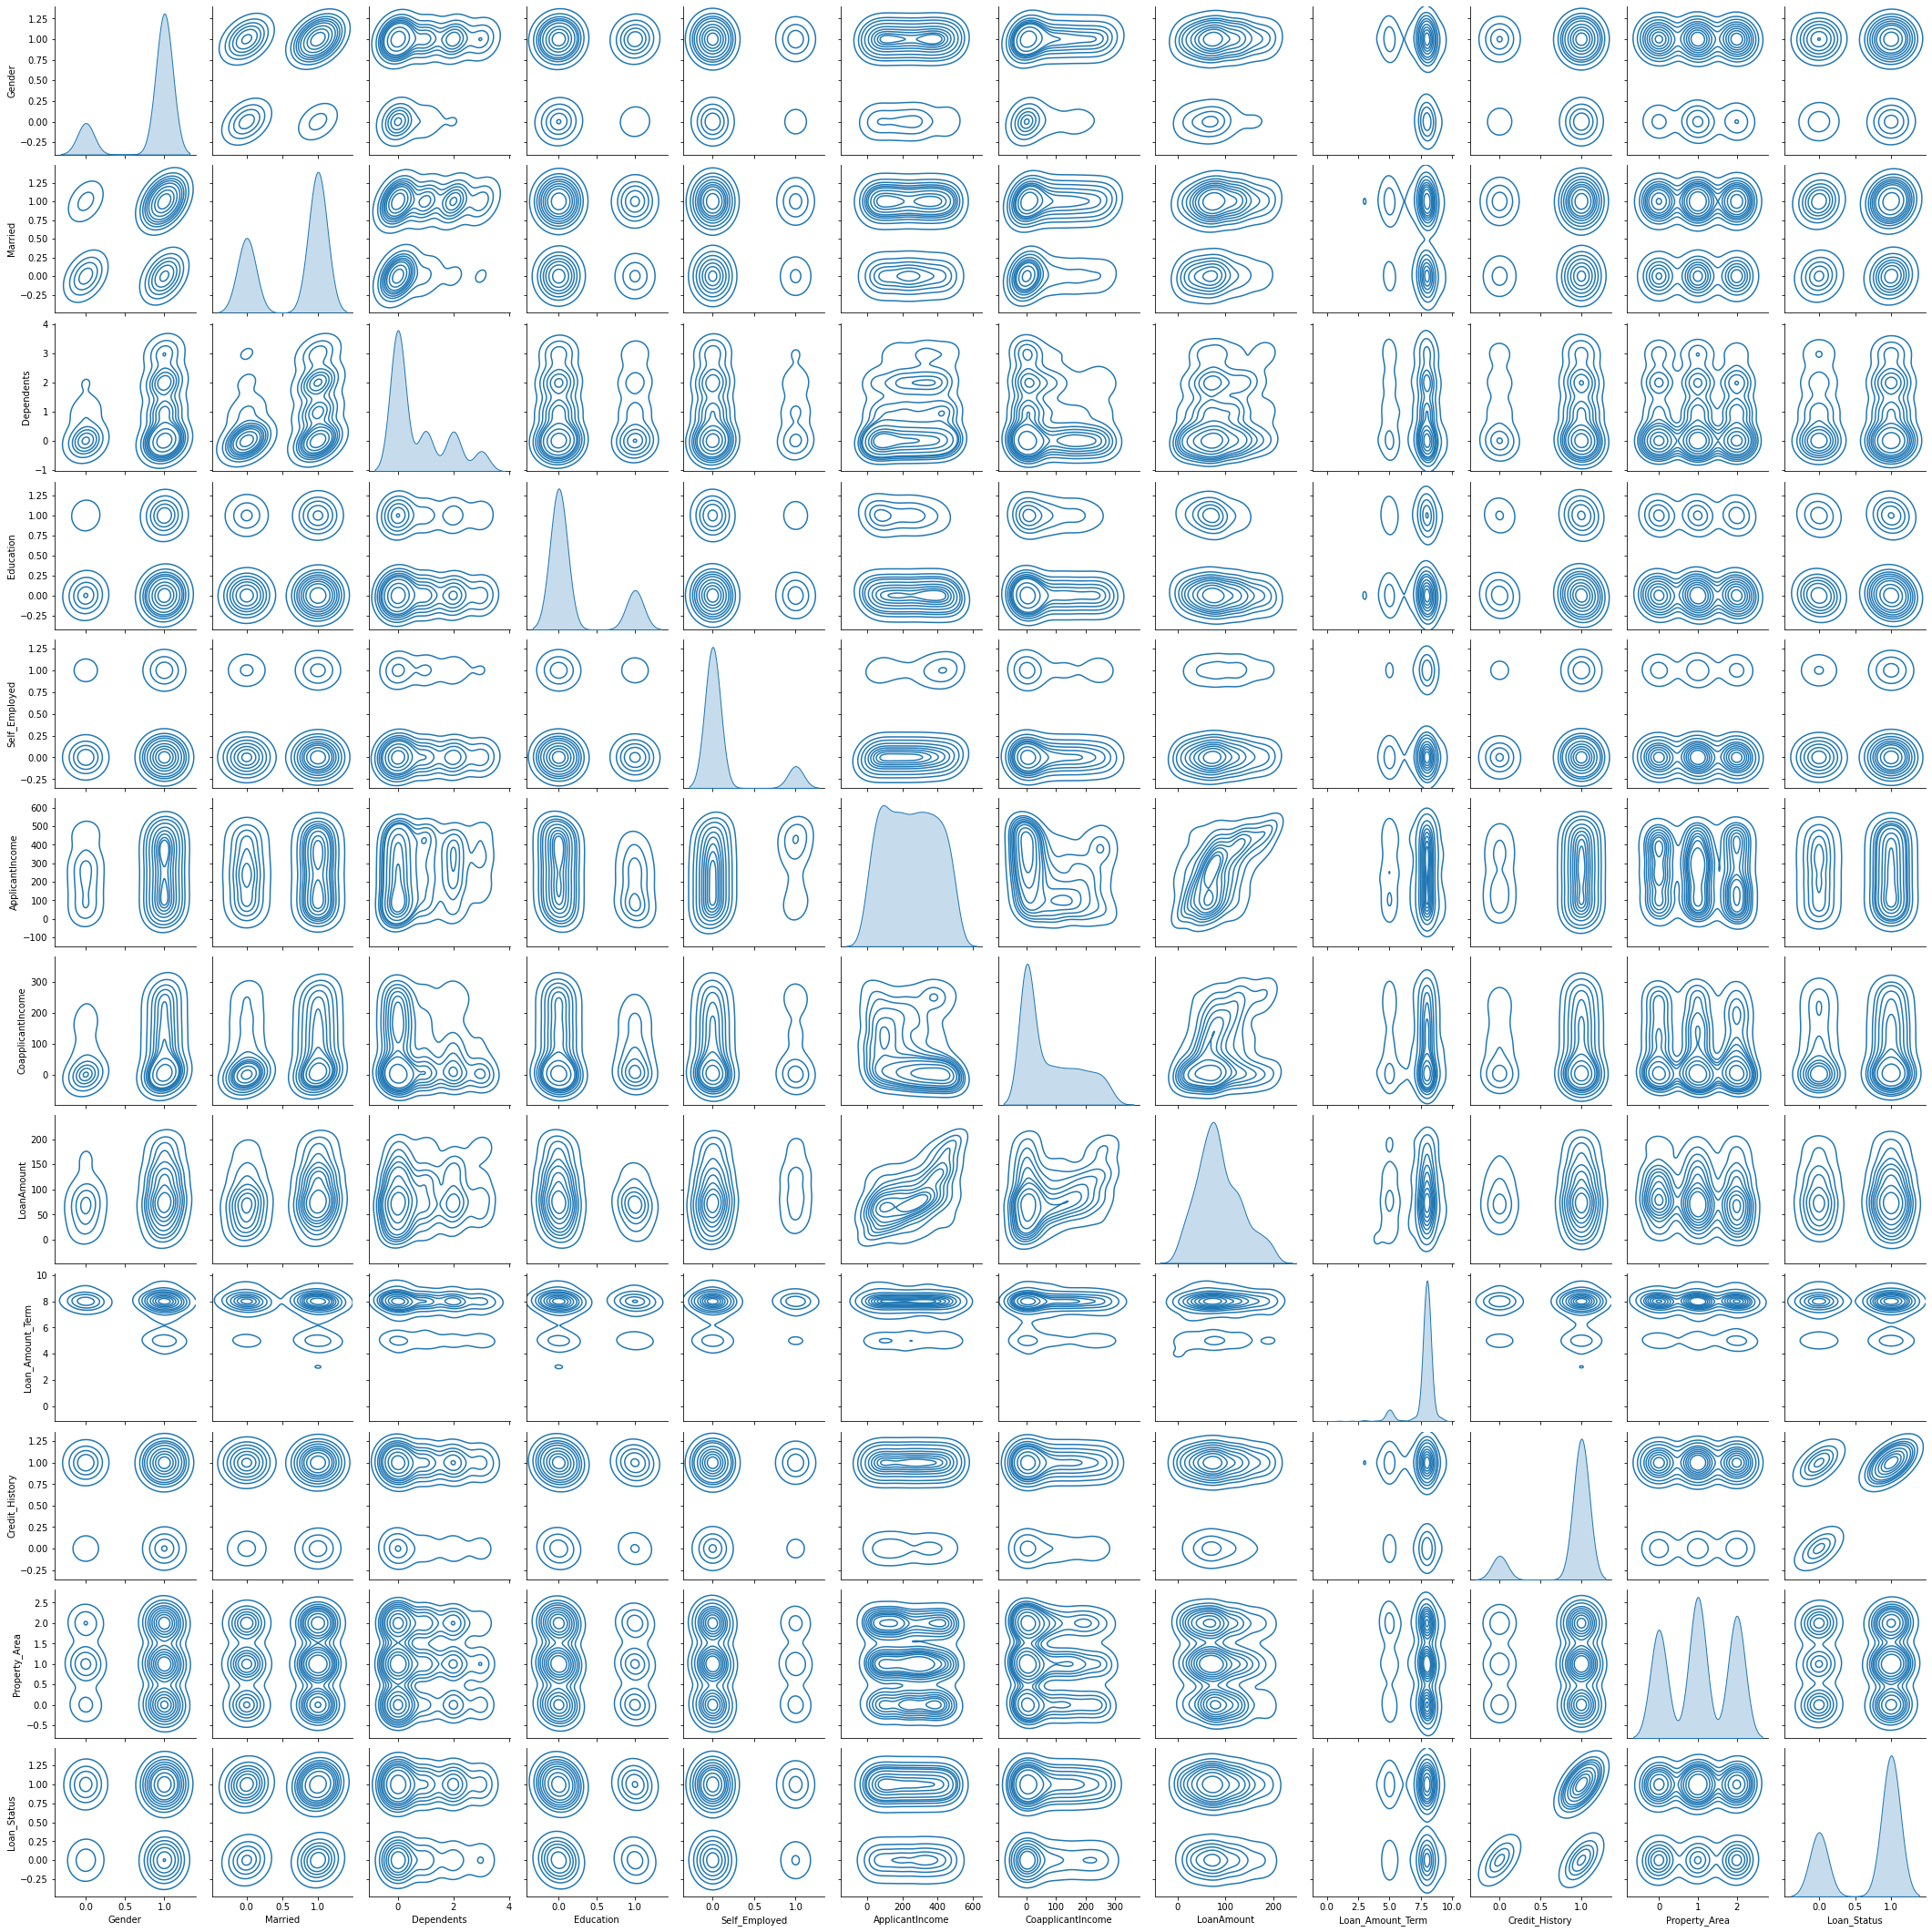

In [28]:
sns.pairplot(df1, kind='kde')

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

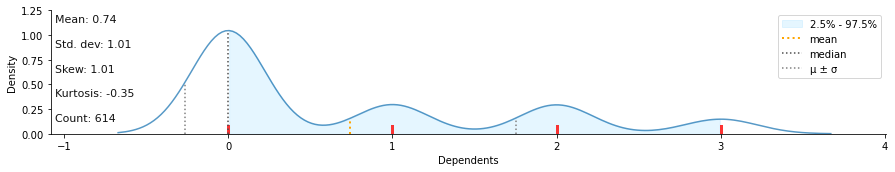

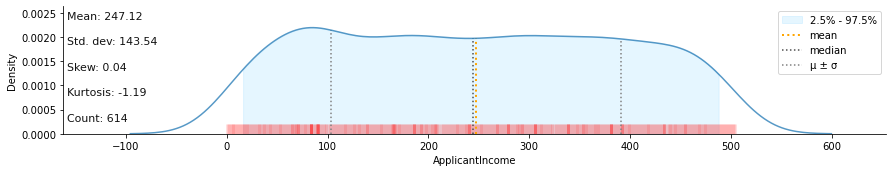

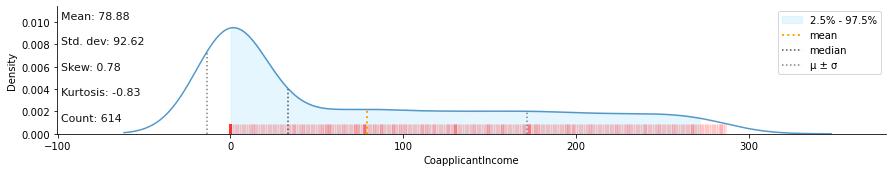

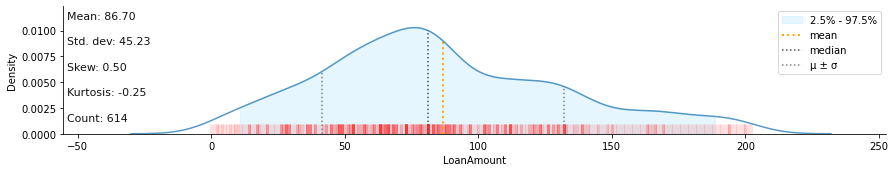

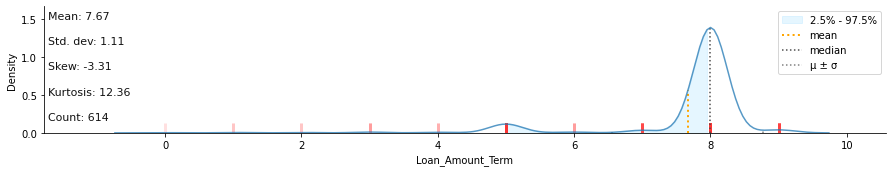

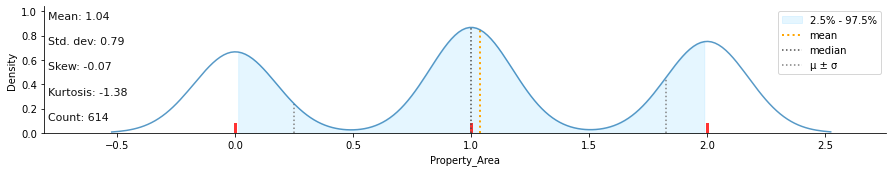

In [29]:
import klib
klib.dist_plot(df1)

In [30]:
df1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.501334
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

From the distribution plots and skewness method, we can see that most of the variables have problem of skewness.

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

threshold=3
print(np.where(z>3))

df_new=df1[(z<3).all(axis=1)]
df_new

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))


Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0              376   
1         1        1           1          0              0              306   
2         1        1           0          0              1              139   
3         1        1           0          1              0               90   
4         1        0           0          0              0              381   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0              125   
610       1        1           3          0              0              275   
611       1        1           1          0              0              431   
612       1        1           2          0              0              422   
613       0        0           0          0              1              306   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0          81                 8               1   
1                   60          81                 8               1   
2                    0          26                 8               1   
3                  160          73                 8               1   
4                    0          94                 8               1   
..                 ...         ...               ...             ...   
609                  0          29                 8               1   
610                  0           7                 5               1   
611                  3         162                 8               1   
612                  0         132                 8               1   
613                  0          86                 8               0   

     Property_Area  Loan_Status  
0                2            1  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[602 rows x 12 columns]

In [32]:
602/614

0.9804560260586319

When we checked for the outliers with the help of Z score, we found them and after that if we remove them, we are loosing only 2% data, which we can afford to loose.

In [33]:
df1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.501334
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

eventhogh we removed the outliers, there is not much impact on the skewness, hence we will use transformatin technique to reduce the skewness.

In [34]:
dfx = df1.iloc[:,:-1]
dfx

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0              376   
1         1        1           1          0              0              306   
2         1        1           0          0              1              139   
3         1        1           0          1              0               90   
4         1        0           0          0              0              381   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0              125   
610       1        1           3          0              0              275   
611       1        1           1          0              0              431   
612       1        1           2          0              0              422   
613       0        0           0          0              1              306   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                    0          81                 8               1   
1                   60          81                 8               1   
2                    0          26                 8               1   
3                  160          73                 8               1   
4                    0          94                 8               1   
..                 ...         ...               ...             ...   
609                  0          29                 8               1   
610                  0           7                 5               1   
611                  3         162                 8               1   
612                  0         132                 8               1   
613                  0          86                 8               0   

     Property_Area  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[614 rows x 11 columns]

In [35]:
dfy = df1.iloc[:,-1:]
dfy

Loan_Status
0              1
1              0
2              1
3              1
4              1
..           ...
609            1
610            1
611            1
612            1
613            0

[614 rows x 1 columns]

In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [37]:
trainx, trainy = sm.fit_resample(dfx, dfy)

In [38]:
trainx.shape

(844, 11)

In [39]:
trainy.shape

(844, 1)

In [40]:
trainy.value_counts()

Loan_Status
1              422
0              422
dtype: int64

With the help of SMOTE we have balance the dataset. Now we have equal number of rows for both classes.

In [41]:
from sklearn.preprocessing import power_transform
data = power_transform(trainx, method = "yeo-johnson")
data

array([[ 0.52983807, -1.17080593, -0.77579057, ...,  0.28491177,
         0.62119119,  1.26654167],
       [ 0.52983807,  0.85411252,  1.0261278 , ...,  0.28491177,
         0.62119119, -1.26432549],
       [ 0.52983807,  0.85411252, -0.77579057, ...,  0.28491177,
         0.62119119,  1.26654167],
       ...,
       [ 0.52983807, -1.17080593, -0.77579057, ..., -2.03743864,
        -1.60981035,  0.17451144],
       [-1.88736911, -1.17080593, -0.77579057, ...,  0.28491177,
         0.62119119, -1.26432549],
       [-1.88736911,  0.85411252, -0.77579057, ...,  0.28491177,
        -1.60981035,  0.17451144]])

In [42]:
x = pd.DataFrame(data)
x

0         1         2         3         4         5         6   \
0    0.529838 -1.170806 -0.775791 -0.474303 -0.336833  0.889590 -1.074671   
1    0.529838  0.854113  1.026128 -0.474303 -0.336833  0.467450  0.583557   
2    0.529838  0.854113 -0.775791 -0.474303  2.968830 -0.682049 -1.074671   
3    0.529838  0.854113 -0.775791  2.108355 -0.336833 -1.088132  1.006784   
4    0.529838 -1.170806 -0.775791 -0.474303 -0.336833  0.918825 -1.074671   
..        ...       ...       ...       ...       ...       ...       ...   
839 -1.887369 -1.170806 -0.775791 -0.474303 -0.336833  0.442527  1.036070   
840 -1.887369 -1.170806 -0.775791 -0.474303 -0.336833  0.699724  1.020329   
841  0.529838 -1.170806 -0.775791 -0.474303 -0.336833 -0.031075  1.204702   
842 -1.887369 -1.170806 -0.775791 -0.474303 -0.336833  0.705733  1.014959   
843 -1.887369  0.854113 -0.775791 -0.474303 -0.336833 -1.534902  1.114133   

           7         8         9         10  
0   -0.022709  0.284912  0.621191  1.266542  
1   -0.022709  0.284912  0.621191 -1.264325  
2   -1.508769  0.284912  0.621191  1.266542  
3   -0.205699  0.284912  0.621191  1.266542  
4    0.260306  0.284912  0.621191  1.266542  
..        ...       ...       ...       ...  
839 -0.252644  0.284912  0.621191  0.174511  
840  0.548517  0.284912  0.621191 -1.264325  
841  0.508276 -2.037439 -1.609810  0.174511  
842  0.568528  0.284912  0.621191 -1.264325  
843  0.467739  0.284912 -1.609810  0.174511  

[844 rows x 11 columns]

As i could not remove the outliers, i have transformed the dataset and as the result the skewness in the data has reduced.

In [43]:
x.skew()

0    -1.359949
1    -0.317258
2     0.553361
3     1.636962
4     2.636686
5    -0.270257
6    -0.046975
7    -0.039589
8    -0.240086
9    -0.990380
10   -0.102904
dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [45]:
x = sc.fit_transform(x)
x

array([[ 0.52983807, -1.17080593, -0.77579057, ...,  0.28491177,
         0.62119119,  1.26654167],
       [ 0.52983807,  0.85411252,  1.0261278 , ...,  0.28491177,
         0.62119119, -1.26432549],
       [ 0.52983807,  0.85411252, -0.77579057, ...,  0.28491177,
         0.62119119,  1.26654167],
       ...,
       [ 0.52983807, -1.17080593, -0.77579057, ..., -2.03743864,
        -1.60981035,  0.17451144],
       [-1.88736911, -1.17080593, -0.77579057, ...,  0.28491177,
         0.62119119, -1.26432549],
       [-1.88736911,  0.85411252, -0.77579057, ...,  0.28491177,
        -1.60981035,  0.17451144]])

In [46]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score we can achive is  ", maxscore, 'at an ideal Random state ', maxRS)

Best accuracy score we can achive is   0.8346456692913385 at an ideal Random state  45


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=45)

In [48]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.8149606299212598
[[104  15]
 [ 32 103]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.82       119
           1       0.87      0.76      0.81       135

    accuracy                           0.81       254
   macro avg       0.82      0.82      0.81       254
weighted avg       0.82      0.81      0.81       254



accuracy_score of SVC() is:
0.8228346456692913
[[ 80  39]
 [  6 129]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       119
           1       0.77      0.96      0.85       135

    accuracy                           0.82       254
   macro avg       0.85      0.81      0.82       254
weighted avg       0.84      0.82      0.82       254



accuracy_score of KNeighborsClassifier() is:
0.7834645669291339
[[ 87  32]
 [ 23 112]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,trainy,cv=kfold)
    print(i, "CV Score is ",score.mean())

DecisionTreeClassifier() CV Score is  0.7584037757114681
SVC() CV Score is  0.7249788672865597
KNeighborsClassifier() CV Score is  0.7108763031839954
RandomForestClassifier() CV Score is  0.8045505776275006
LogisticRegression() CV Score is  0.7249577345731192


In [50]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False] }

In [51]:
from sklearn.model_selection import GridSearchCV
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [52]:
GSV.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 18,
 'oob_score': False}

In [53]:
Final_model = RandomForestClassifier(bootstrap= True, max_features= 'log2', min_samples_split= 3, n_estimators= 18, oob_score=False)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

83.85826771653542
[[ 94  25]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       119
           1       0.83      0.88      0.85       135

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



With the help of hyper parameter tuning we have achieved accuracy score of 84%.

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.64444444, 0.91666667, 0.62962963, 0.72222222, 0.        ,
       0.        , 0.96296296, 0.70833333, 0.53703704, 0.88888889,
       0.62037037, 0.17685185, 0.05555556, 0.21296296, 0.43518519,
       0.53240741, 0.        , 0.62962963, 0.        , 0.59259259,
       0.76851852, 1.        , 0.85185185, 0.38888889, 0.5       ,
       0.50462963, 0.94444444, 0.61111111, 0.72222222, 0.51851852,
       0.73148148, 0.62962963, 0.7962963 , 0.        , 0.        ,
       0.        , 0.61944444, 0.59722222, 0.        , 0.38888889,
       0.82407407, 0.27777778, 0.73611111, 0.47685185, 0.        ,
       0.97222222, 0.51851852, 0.94444444, 0.03703704, 0.81944444,
       0.62037037, 0.48611111, 0.91666667, 0.75      , 0.45833333,
       0.72592593, 0.05555556, 0.90277778, 0.89814815, 0.56388889,
       0.03703704, 0.60185185, 0.96296296, 0.91666667, 0.88888889,
       0.77777778, 0.05555556, 0.88888889, 0.11111111, 0.65740741,
       0.83333333, 0.63425926, 0.55555556, 0.86111111, 0.72222

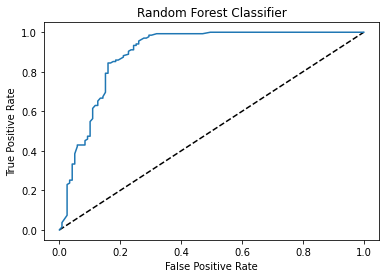

AUC_ROC Score =  0.835698723934018


In [56]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

In [58]:
import joblib
joblib.dump(Final_model,'Loan_Application.obj')

['Loan_Application.obj']